In [6]:
from utils.binaries import *
from utils.plotting import *

data = np.loadtxt('/cr/data01/filip/Data/daqIntegrationTests/v34/calib.test')

In [7]:
dt = np.diff(data[:, 0])
thresholds = data[1:, 1::2]
rates = data[1:, 2::2]

mask = dt > 0
dt = dt[mask]
rates = rates[mask].T
thresholds = thresholds[mask].T

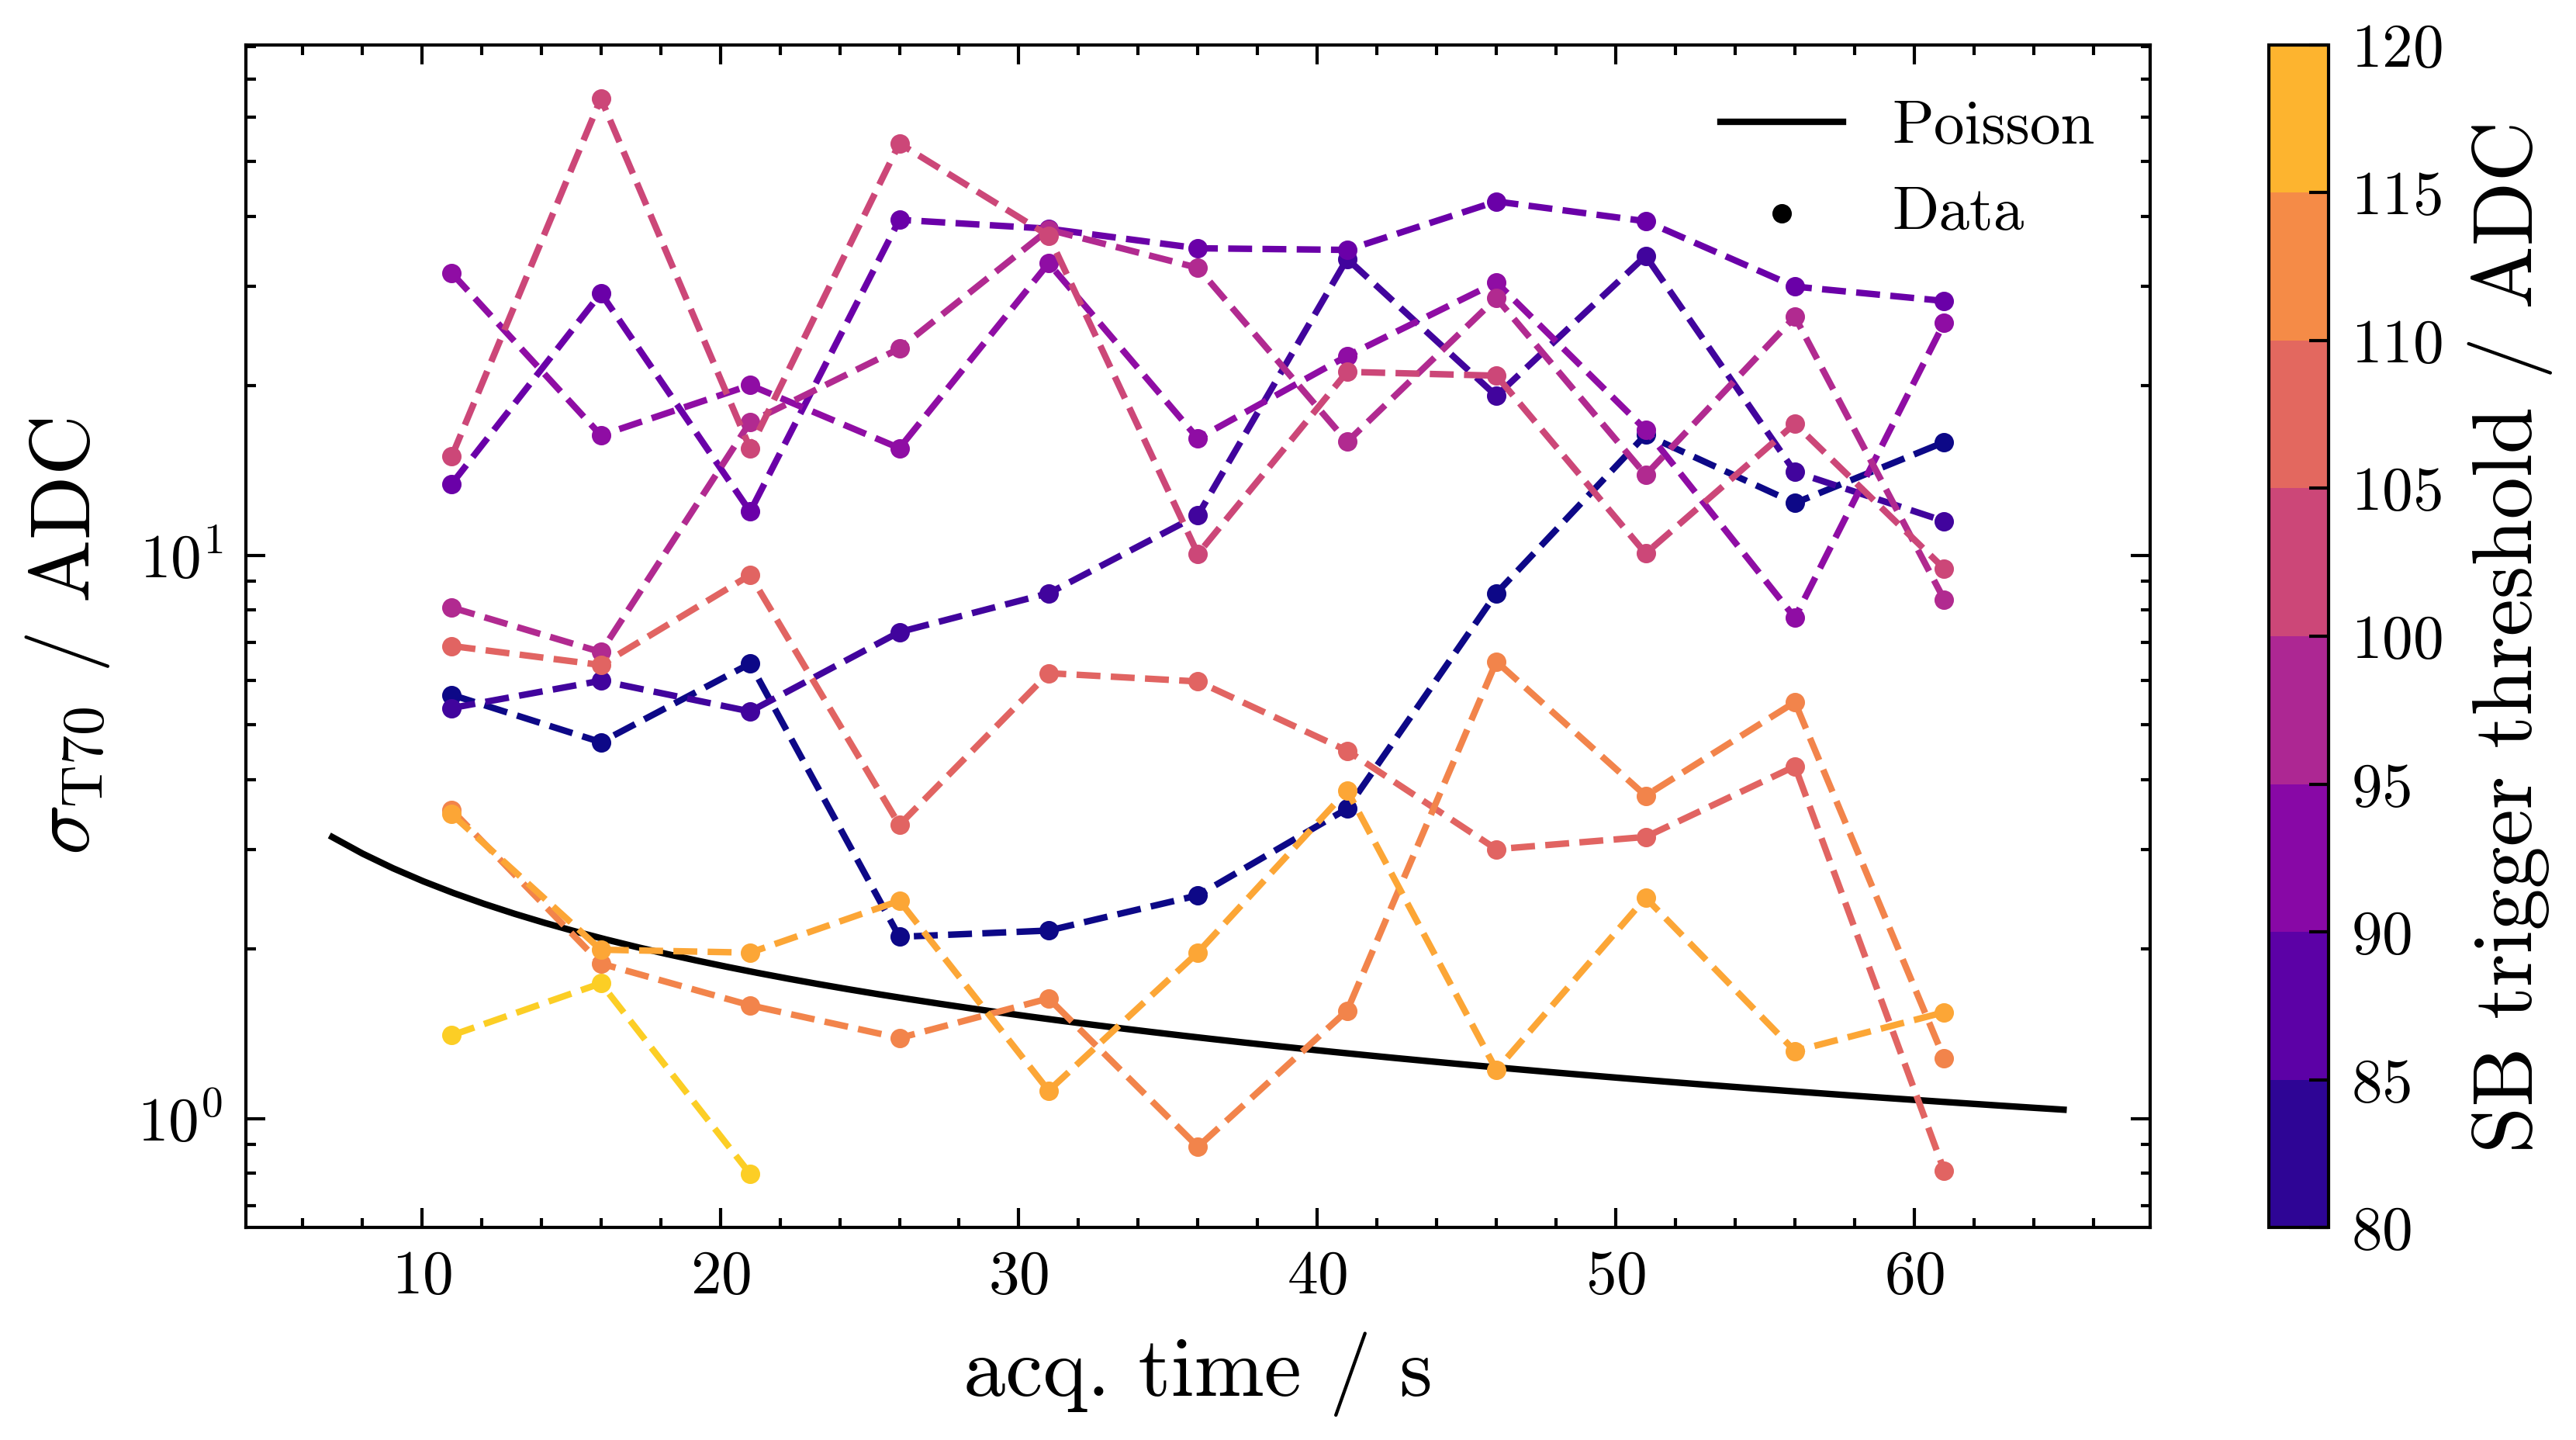

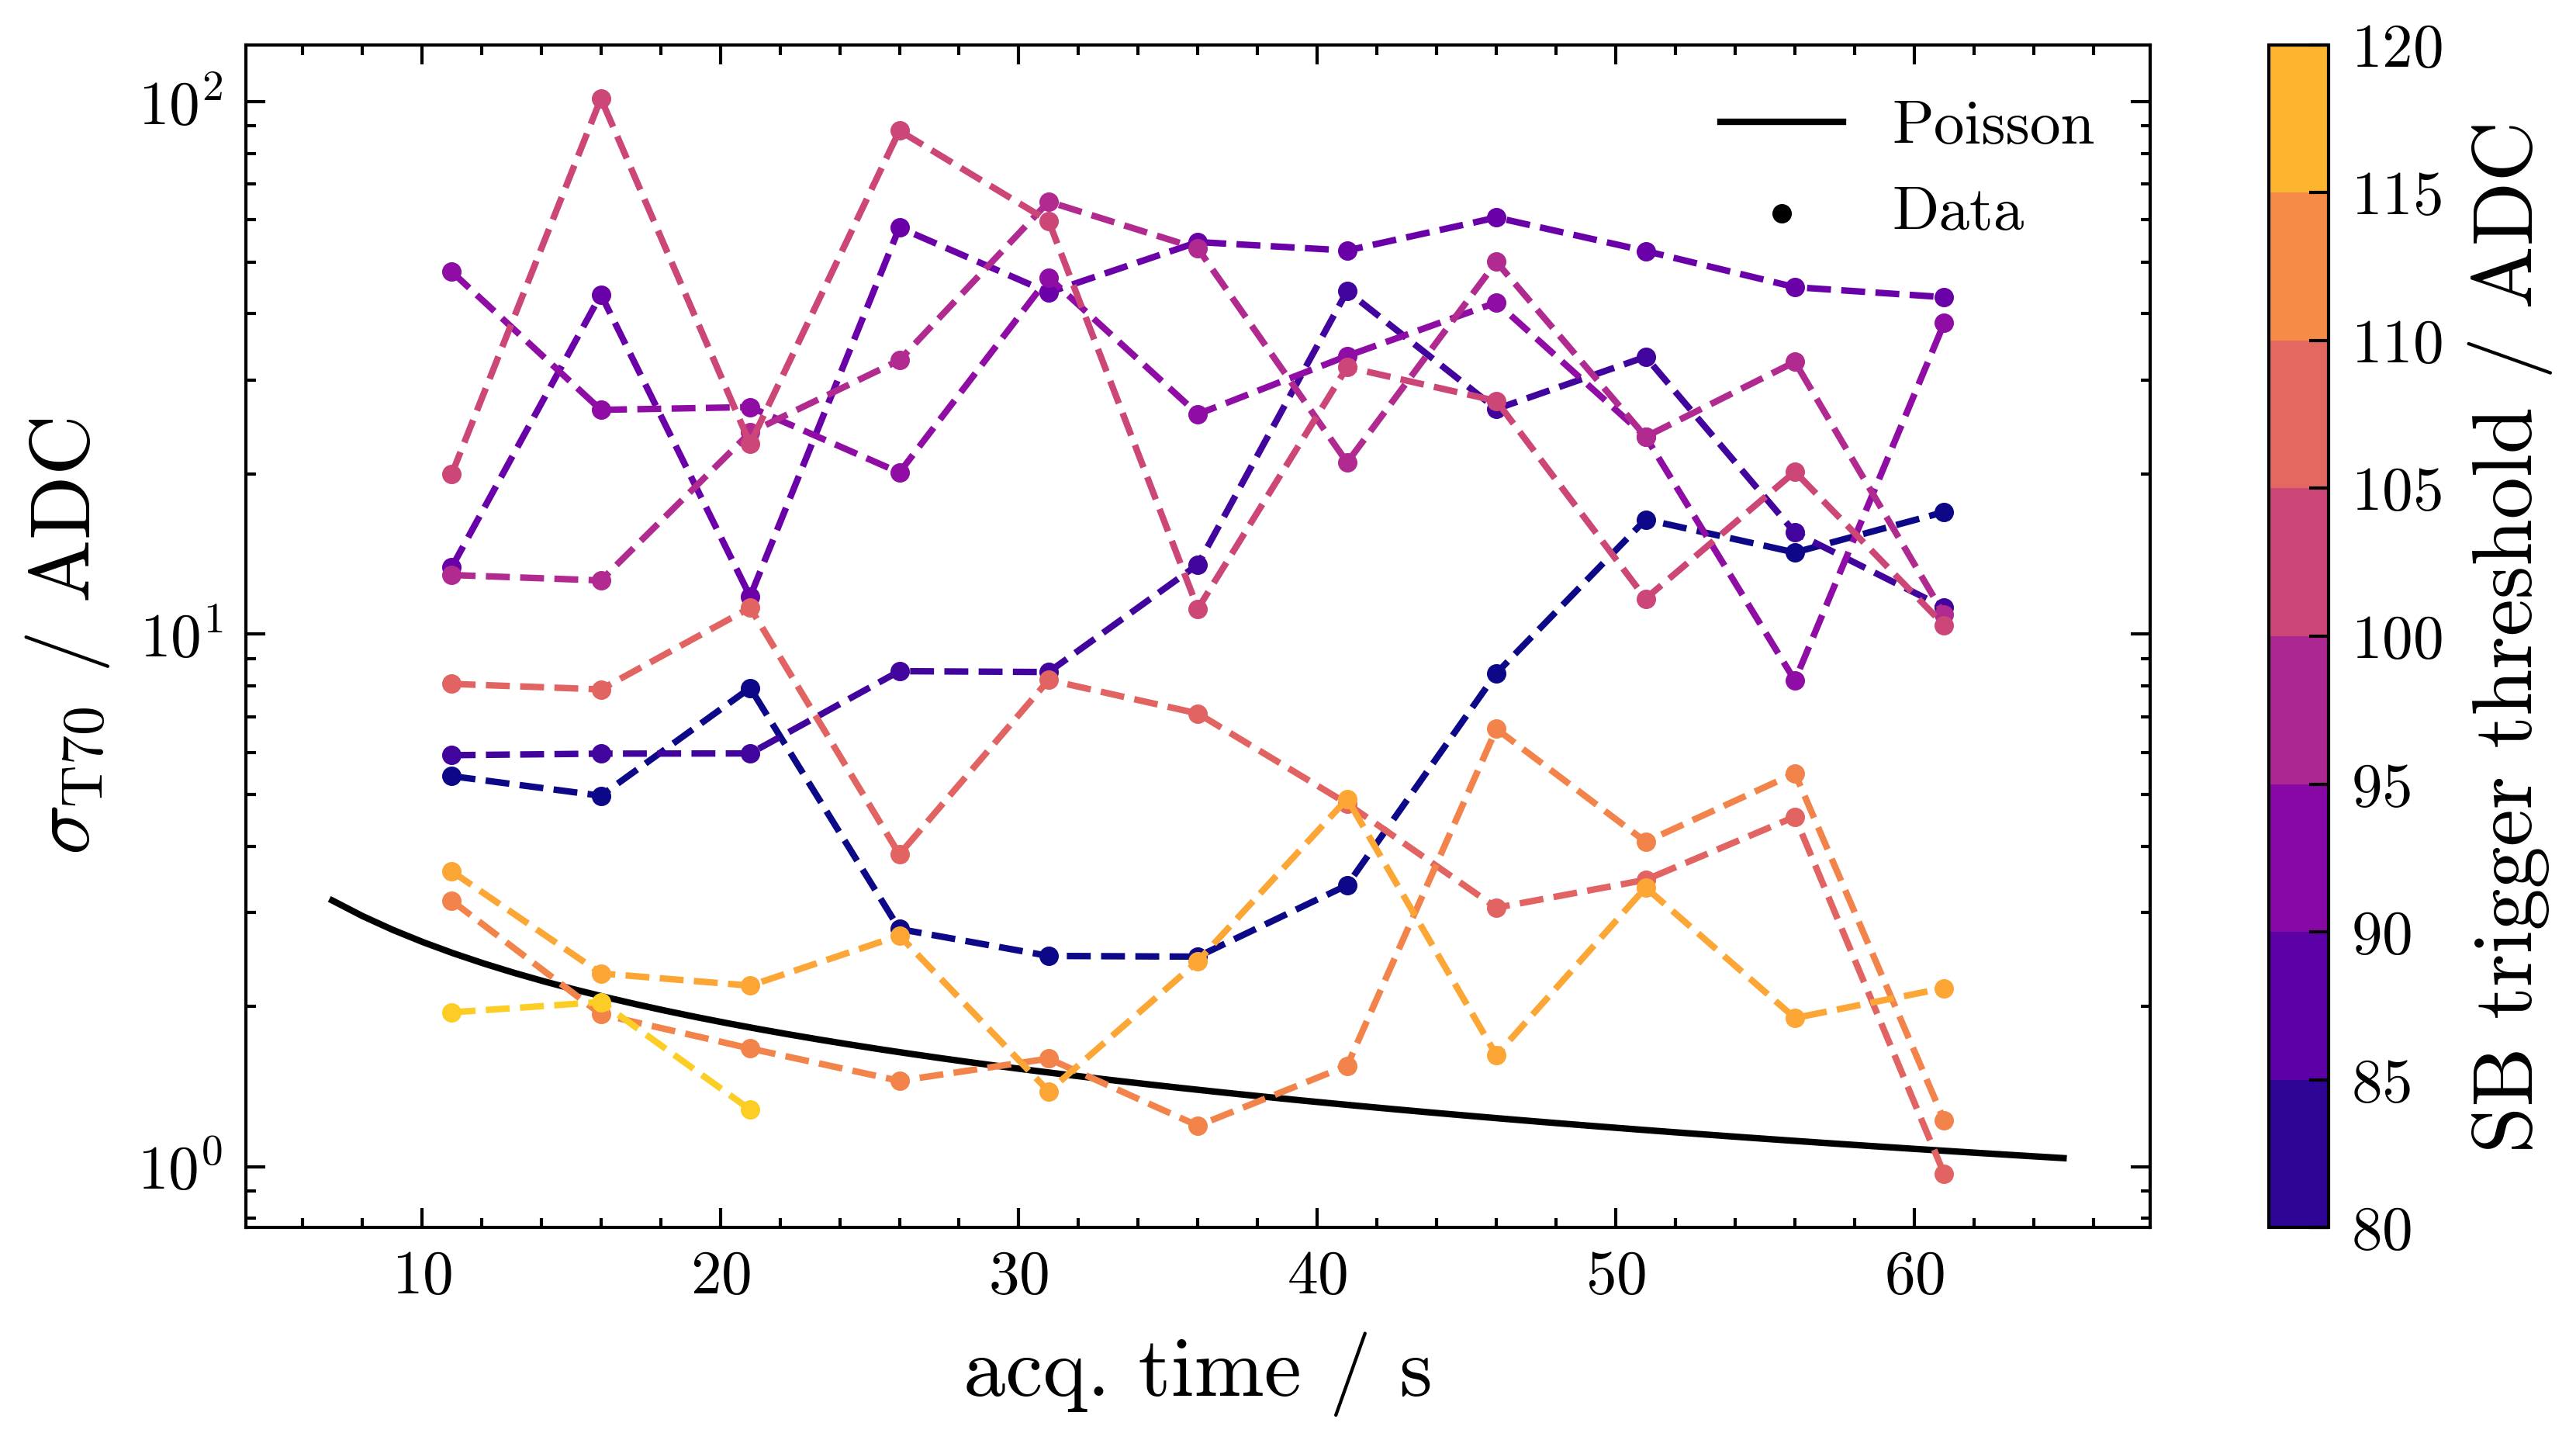

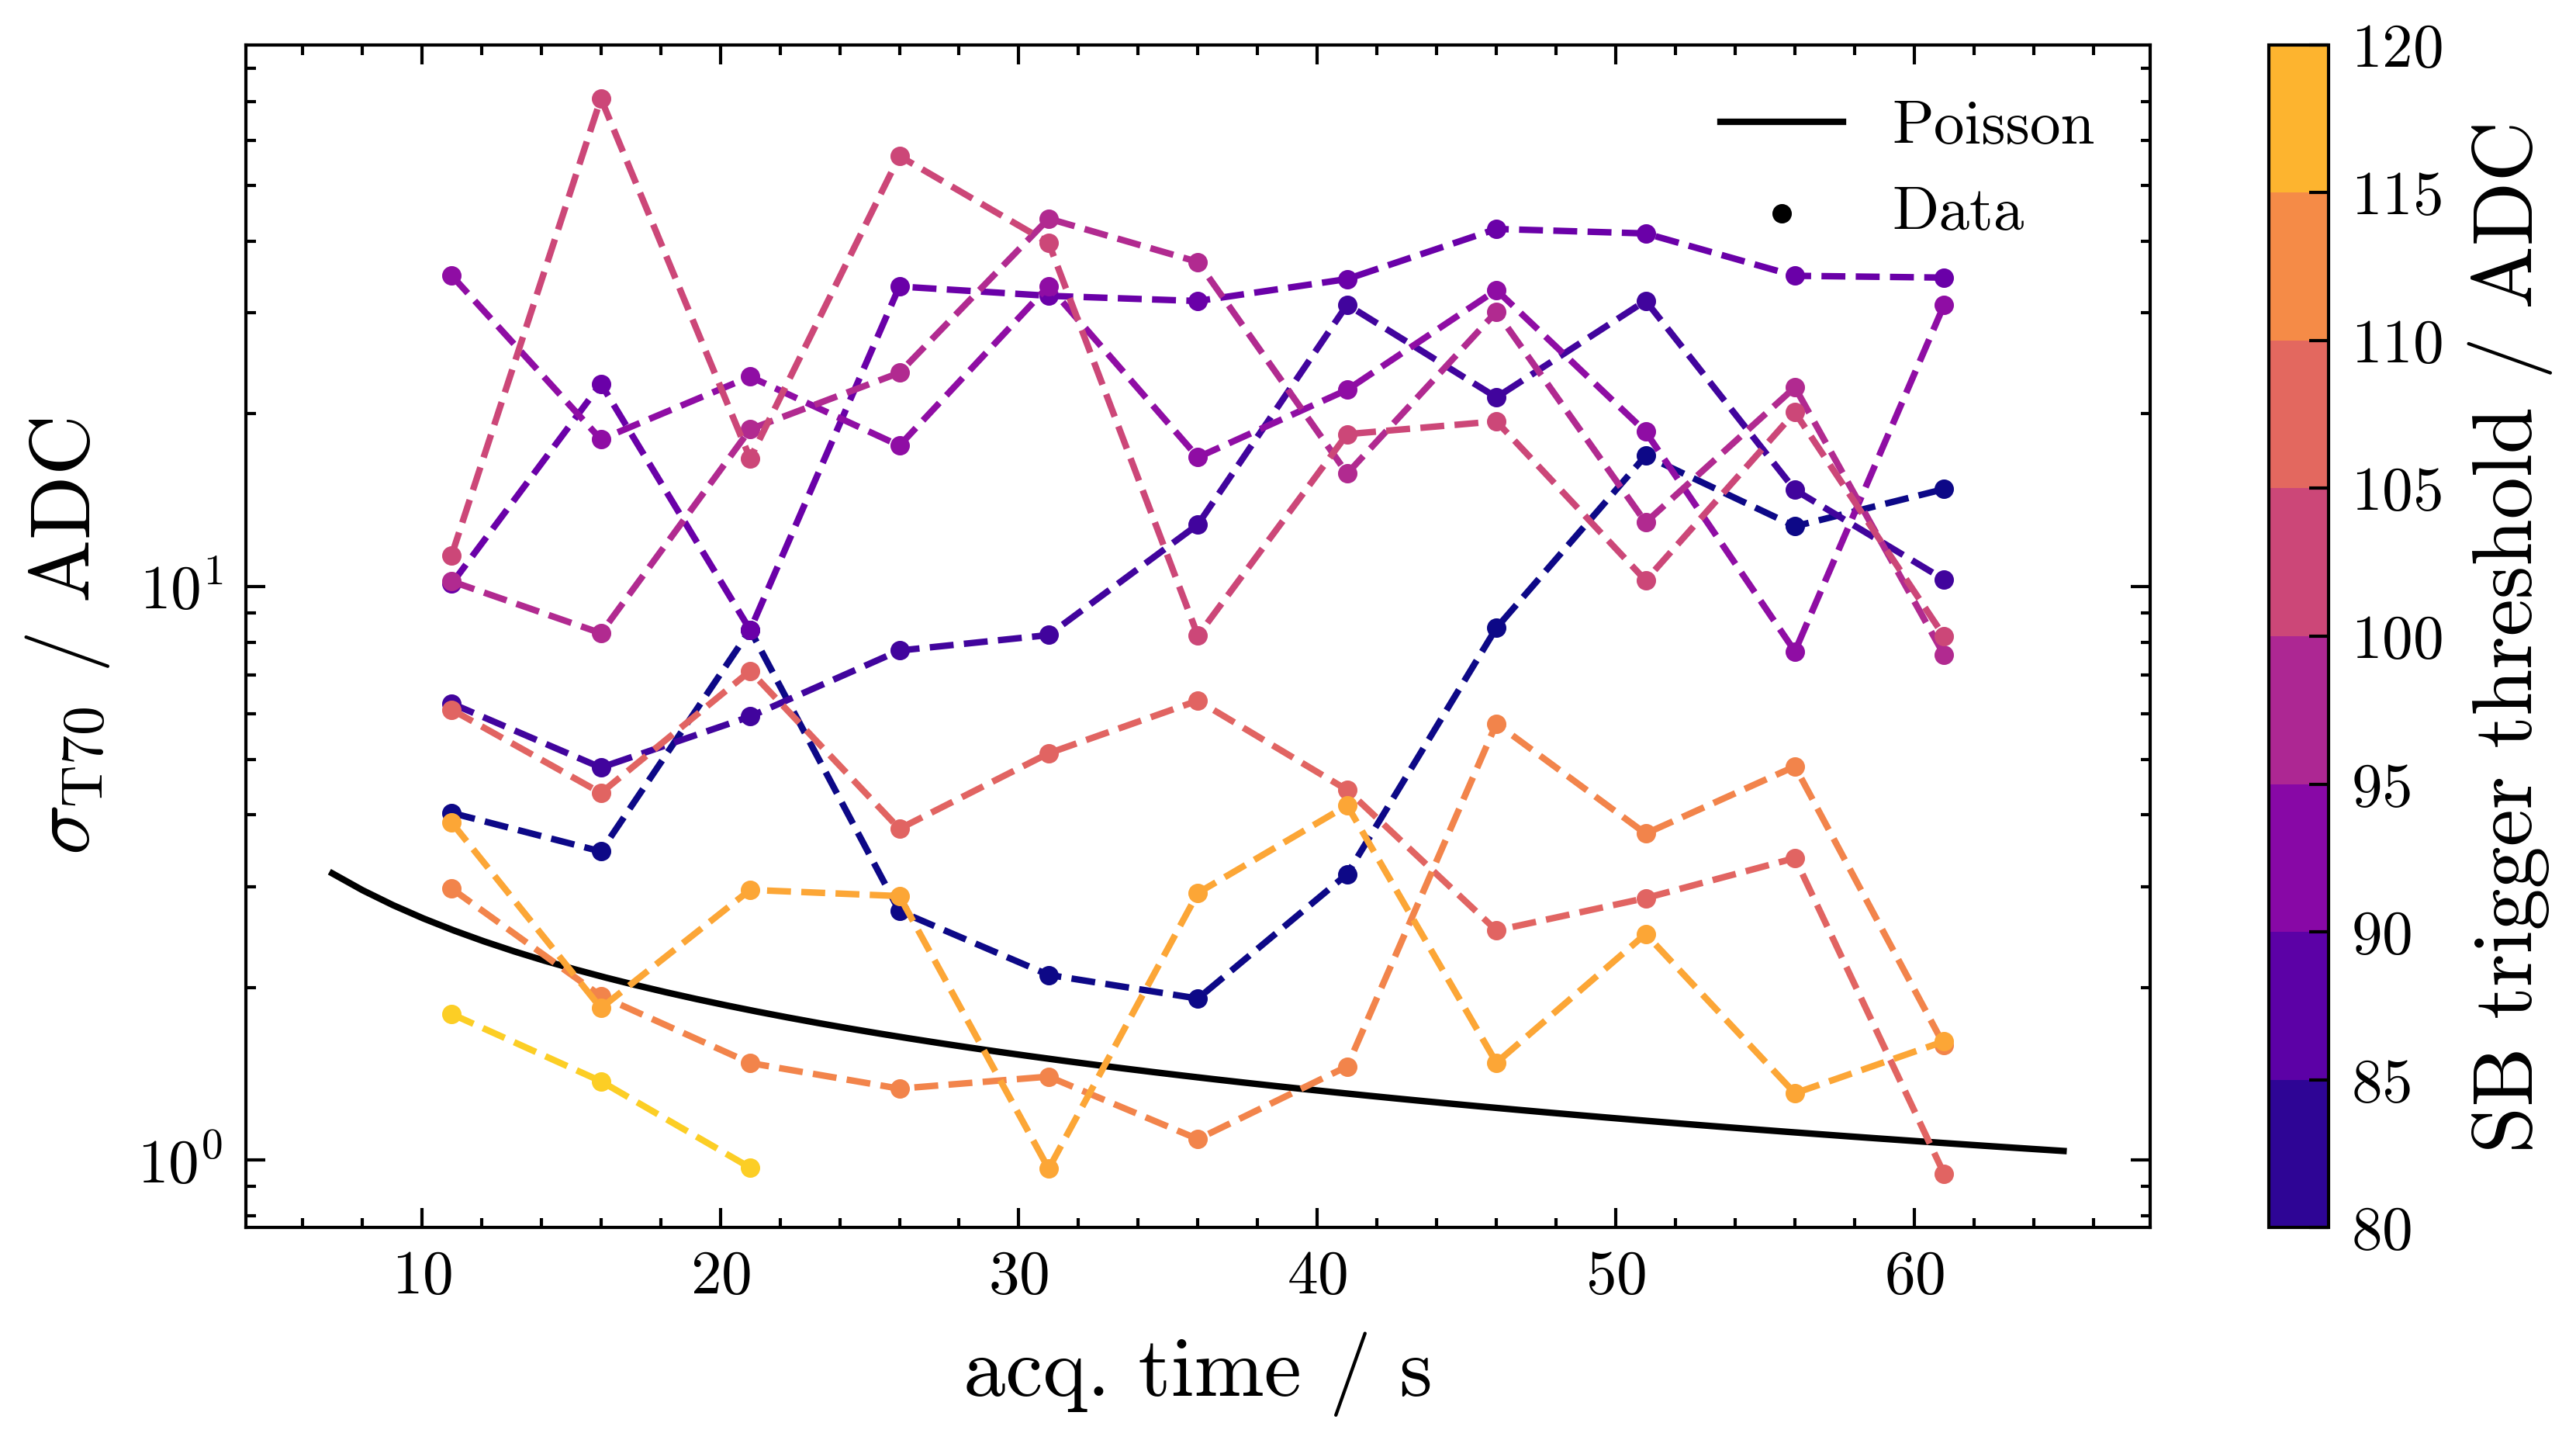

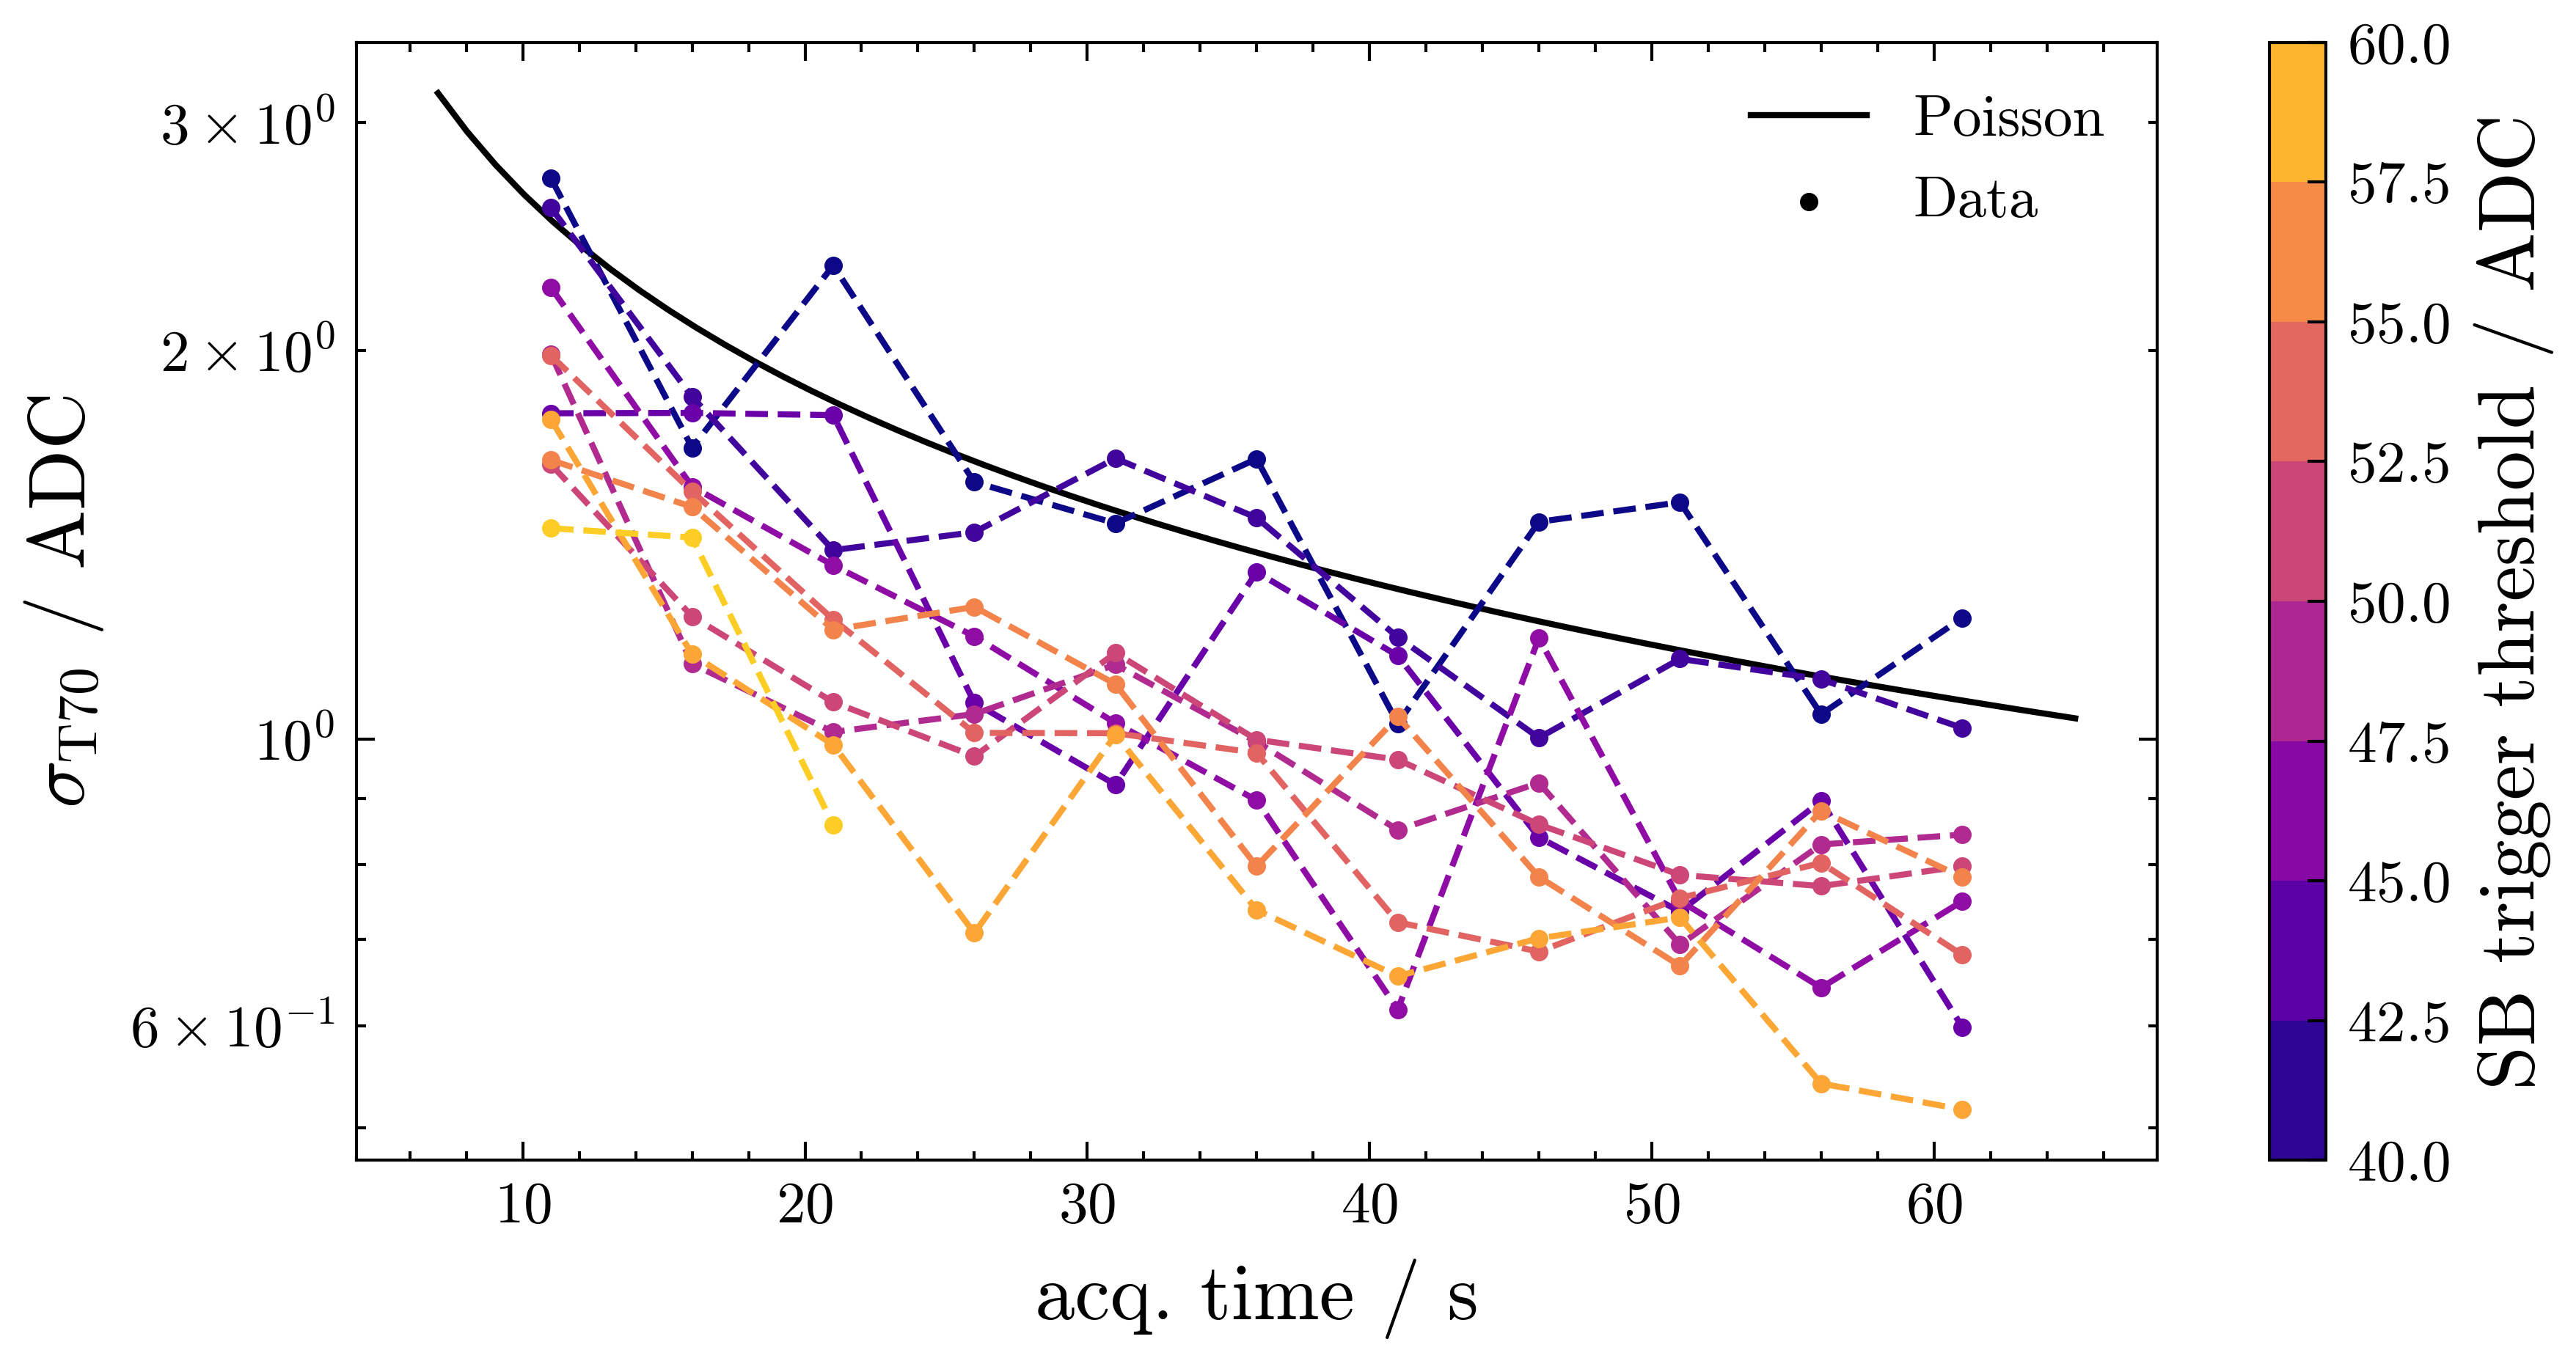

In [15]:
import matplotlib as mpl


colors = plot.gradient(plt.cm.plasma, 10)
axes = [plt.subplots()[1] for _ in range(4)]

for i, ax in enumerate(axes):
    rate, threshold = rates[i], thresholds[i]
    time, noise = [[] for _ in range(10)], [[] for _ in range(10)]
    X = np.linspace(7, 65, 58)
    ax.plot(X, np.sqrt(70/X), c='k', ls='solid')

    ax.set_yscale('log')
    ax.plot([],[],label='Poisson')
    ax.scatter([],[],label='Data')
    ax.set_xlabel('acq. time / s')
    ax.set_ylabel(r'$\sigma_\mathrm{T70}$ / ADC')
    ax.legend()



    for j, th in enumerate(np.unique(threshold)):
        for t in np.unique(dt):
            mask = np.logical_and(threshold == th, dt == t)
            this_noise = rate[mask]

            if len(this_noise) < 5: continue

            noise[j].append(np.std(this_noise, ddof=1))
            time[j].append(t)

    for j in range(len(noise)):
        ax.errorbar(time[j], noise[j], c=colors[j], ls='--', markersize=2, marker='o')

    norm = mpl.colors.Normalize(vmin=40 if i==3 else 80,vmax=62.5 if i==3 else 125)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
    # sm.set_array([])
    plt.colorbar(sm, ticks=np.arange(40 if i==3 else 80, 62.5 if i==3 else 125, 2.5 if i==3 else 5), 
                 boundaries=np.arange(40 if i==3 else 80, 62.5 if i==3 else 125, 2.5 if i==3 else 5),
                 ax=ax, label='SB trigger threshold / ADC')
            